In [2]:
import pylineament as ln

# Basic Use of Pylineament using command line / as python functions
What will covered:
- Simpe use of lineament extraction
- Step-by-step use of lineamnet extraction
- Data visualization

## Simpe use of lineament extraction
This section will extract lineament from `e_kal_crop2.tiff` using `ln.dem_to_shp`. If `shp_name` is not defined, generated shapefile will be saved with the same name as input image. In this case `e_kal_crop2`.

`ln.dem_to_shp` will return a dataframe with column:
- `quad`: to which hillshade quadrand does the line extracted. quad 0 -> hillshade with orientation of 22.5. quad 1 -> hillshade with orientation of 45. and so on.
- `group`
- `min_x`: coordinate of minimuim x of a line
- `max_x`: coordinate of maximum x of a line
- `min_y`: ccoordinate of minimuim y of a line
- `max_y`: ccoordinate of maximum y of a line
- `L`: length of line (in pixel scale)
- `deg`: orientationof line (in degree)
- `length`: length of line (in spatial scale, depend on crs being used, could be m or degree)
- `crs`: crs being used in ISPG number

In [3]:
lines = ln.dem_to_shp('e_kal_crop2.tif')
lines.head()

,quad,group,min_x,max_x,min_y,max_y,L,deg,length,crs
0,0.0,21.0,113.508835,113.533019,1.430942,1.419063,30.0,116.169544,0.026944,4326
1,0.0,37.0,113.657039,113.683793,1.420261,1.423471,30.0,83.154509,0.026946,4326
2,0.0,54.0,113.686994,113.713899,1.424469,1.425959,30.0,86.828771,0.026946,4326
3,0.0,59.0,113.423820,113.459712,1.426088,1.424493,40.0,92.545750,0.035928,4326
4,0.0,75.0,113.603371,113.620992,1.428026,1.424534,20.0,101.212795,0.017964,4326


## Step-by-step work on lineament extraction using pylineament
this is not necessary if you want to extract lineamnet directly. This step puroposed only for those who want to thinkering around.
In general there are 4 main function to extract lineament:
- `ln.read_raster` - can be used to read raster data.
    - subImageExtent: will be used to split image into smaller image
    - dem: image in array format
    - extend: spatial boundary box of the image
    - crs_espg: image crs in espg number
- `ln.extract_lineament_points` - can be used to extract anomaly points form image. return:
    - points_container: list consist lineaments extracted from different hillshade orientation.
    - im_prewitt: filtered iamge using prewitt, array format
    - im_prewitt_clip: clipper filtered image using prewitt, array format
- `ln.convert_points_to_line` 
    - lines: consist of lines generated from previous step. Presented as dataframe format
- `ln.reduce_lines` 
    - original_lines: same as lines. 
    - processed_lines: Line overlap reduction result.
    - cleaned_lines: Lines cross cutting reduction result.


all of these step are wrapped in `dem_to_shp` or `dem_to_shp_small` function in pylineament


In [4]:
subImageExtent, dem, extent,crs_espg = ln.read_raster('e_kal_crop2.tif') 

points_container, im_prewitt, im_prewitt_clip =ln.extract_lineament_points(dem)


lines = ln.convert_points_to_line(points_container)

original_lines,processed_lines, cleaned_lines = ln.reduce_lines(lines, 
                                                                extent, 
                                                                dem.shape)

## Dataviz

easiest way to load visualizaiton in by generating shp file, then load it to any gis software. This is just an alternative on how to visualize the data. More visualization option are available in `powerlaw and rose analysis` chapter.

In [5]:
import matplotlib.pyplot as plt

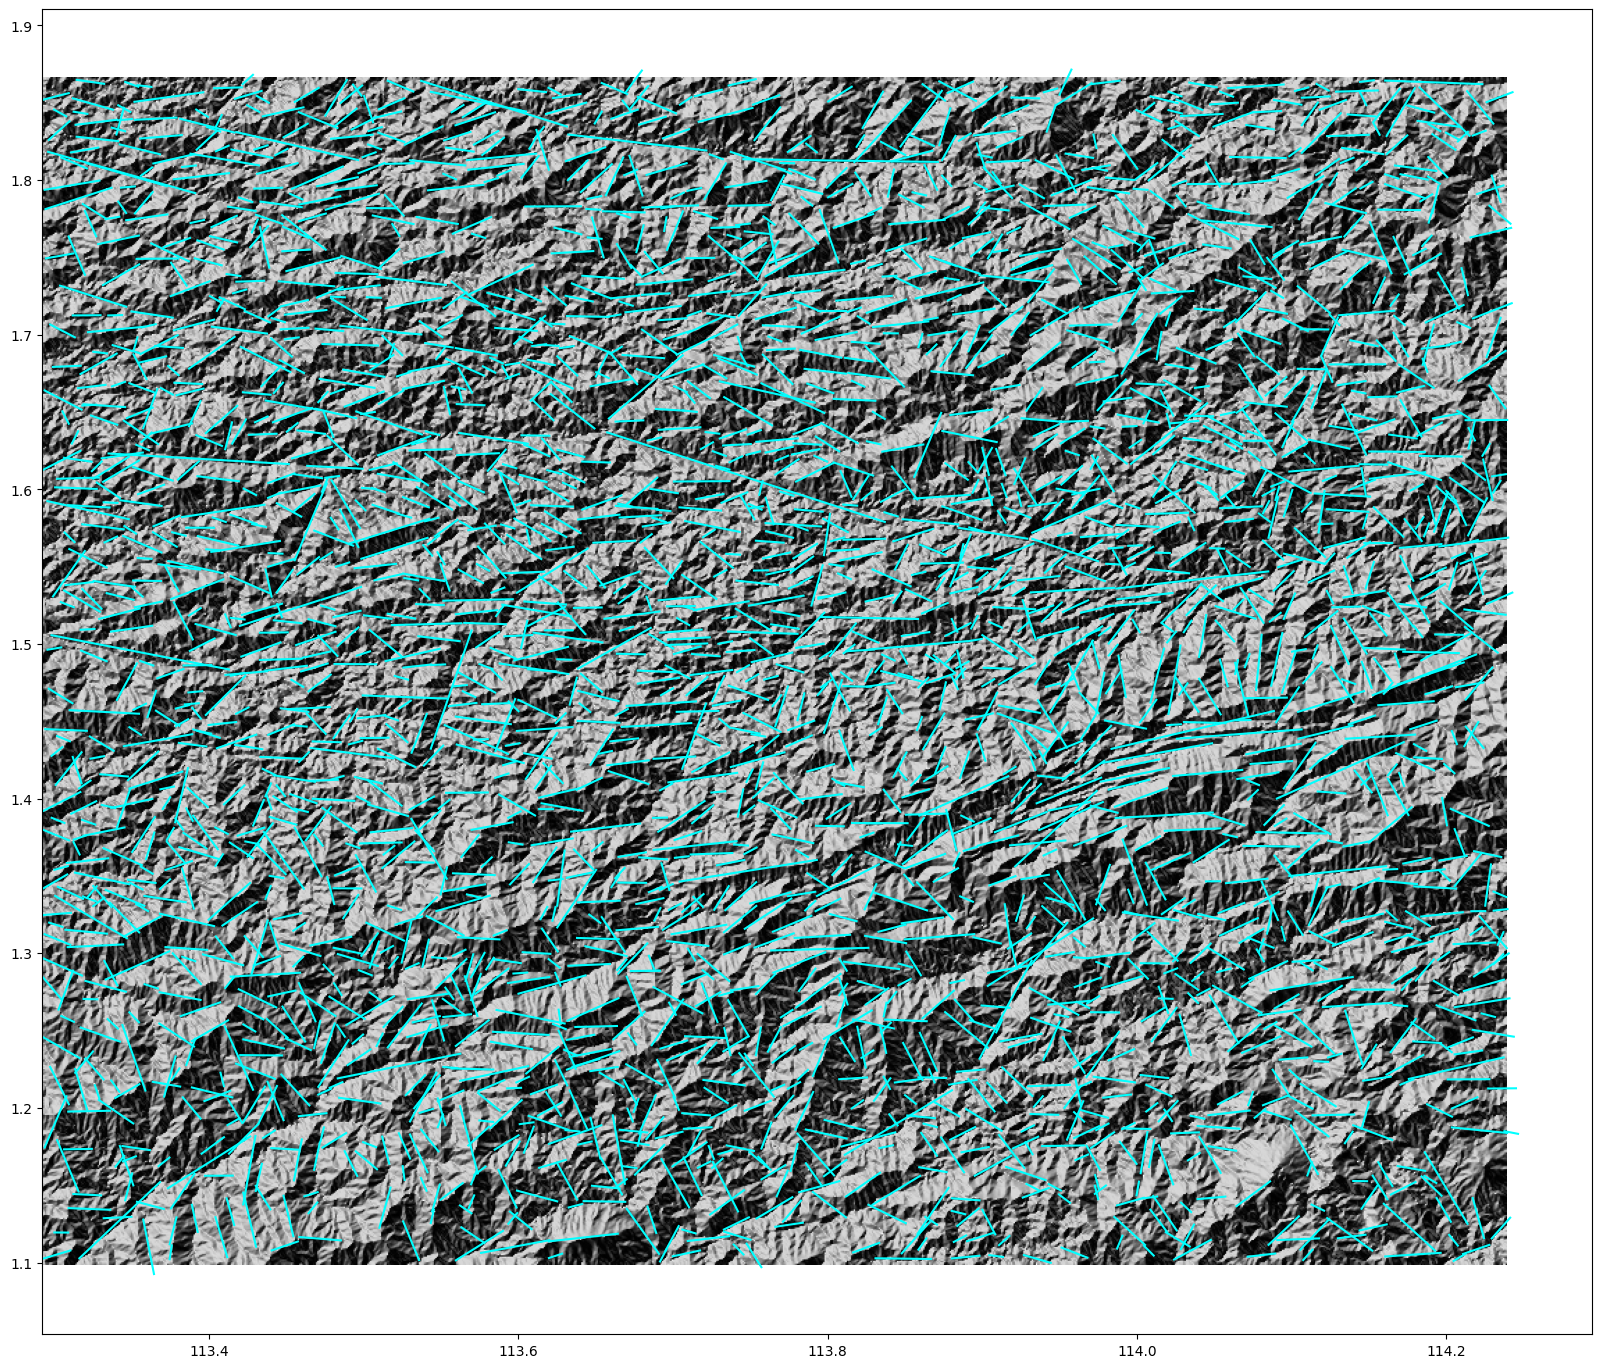

In [ ]:
hs = ln.hillshade(dem)

plt.figure(figsize=(20,20))
plt.imshow(hs, extent=extent, cmap='grey')
# cleaned_lines
for i in range(len(cleaned_lines)):
    minx, maxx,  miny, maxy = cleaned_lines[['min_x' ,'max_x', 'min_y', 'max_y']].iloc[i].values
    plt.plot([minx, maxx], [miny, maxy], color='cyan')

In [7]:
data

array([113.90449444, 113.91339897,   1.10490351,   1.10372645])